In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение CSV файла
file_path = 'data.csv'  # Укажите путь к вашему файлу
data = pd.read_csv(file_path, sep=';', decimal=',', skipinitialspace=True)

# Просмотр первых 5 строк данных
print(data.head())

# Основная информация о данных
print(data.info())

# Статистическое описание
print(data.describe())

   #          Name    LEO   GTO  FullMass              Fuel  Stages  Thrust  \
0  1  Falcon-9 1.0   9.00  3.40    318.00  Кислород-Керосин       2  3800.0   
1  2  Falcon-9 1.1  13.15  4.85    506.00  Кислород-Керосин       2  5885.0   
2  3   Falcon-9 FT  22.80  8.30    550.00  Кислород-Керосин       2  7607.0   
3  4      Электрон   0.25  0.15     12.55  Кислород-Керосин       2   162.0   
4  5         CZ-2C   3.85  1.40    233.00           НДМГ-АТ       2  2961.6   

   Length         Country  ...          Purpose    Class Activity  Design  \
0    54.9             США  ...         Грузовое  Средний      нет  Тандем   
1    68.4             США  ...         Грузовое  Средний      нет  Тандем   
2    70.0             США  ...  Комбинированное  Тяжелый       да  Тандем   
3    17.0  Новая Зеландия  ...         Грузовое   Легкий       да  Тандем   
4    42.0           Китай  ...         Грузовое  Средний       да  Тандем   

  ActiveYears  StartYear  Launches  Failure  SuccessRate  Laun

In [3]:
overview_headers = ['Fuel', 'Country', 'Class', 'Purpose', 'Activity']

Заголовок: Fuel
Fuel
Кислород-Керосин    19
ТТ                   6
НДМГ-АТ              3
Кислород-Водород     2
Name: count, dtype: int64

Заголовок: Country
Country
США               12
Россия             5
Япония             4
СССР               3
Индия              2
Новая Зеландия     1
Китай              1
Украина            1
ЕС                 1
Name: count, dtype: int64

Заголовок: Class
Class
Легкий     12
Средний    11
Тяжелый     7
Name: count, dtype: int64

Заголовок: Purpose
Purpose
Грузовое           25
Комбинированное     5
Name: count, dtype: int64

Заголовок: Activity
Activity
нет    15
да     15
Name: count, dtype: int64



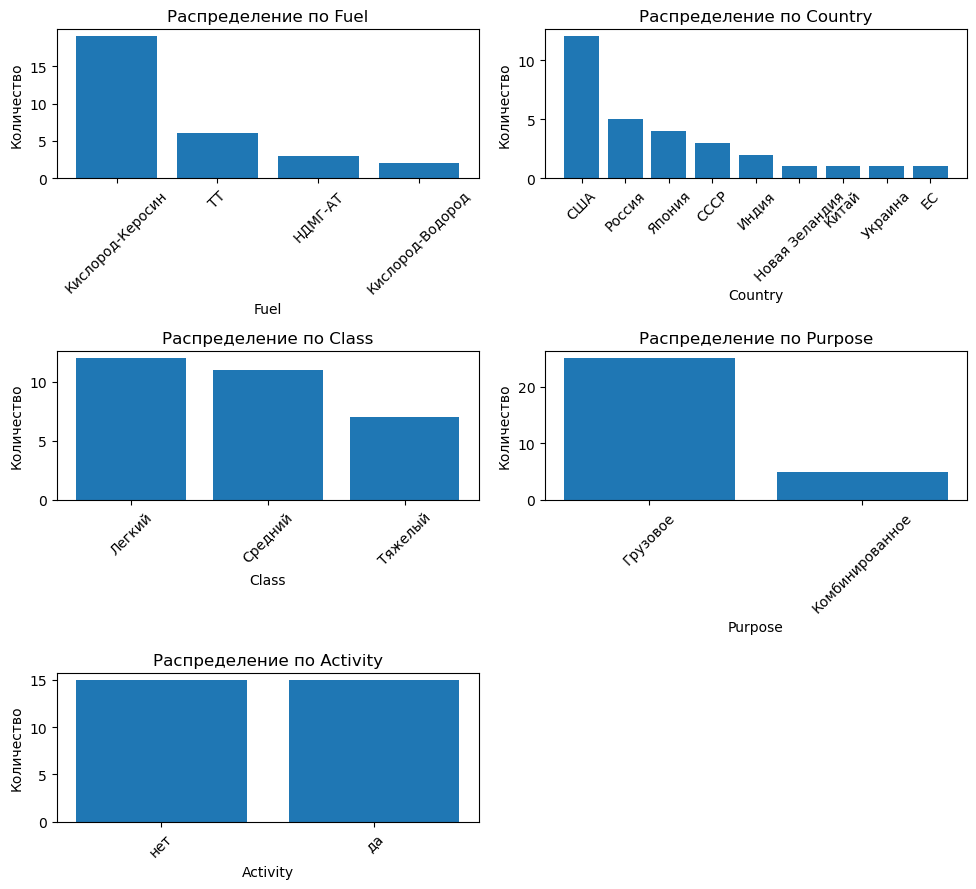

In [4]:
# Определяем количество подграфиков
num_headers = len(overview_headers)
num_cols = 2  # Количество столбцов
num_rows = (num_headers + num_cols - 1) // num_cols  # Количество строк

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))  # Определяем размер фигуры

# Превращаем axs в одномерный массив для удобства
axs = axs.flatten()

for i, header in enumerate(overview_headers):
    print(f'Заголовок: {header}')
    unique_values = data[header].value_counts()
    print(unique_values)
    print()

    axs[i].bar(unique_values.index, unique_values.values)
    axs[i].set_title(f'Распределение по {header}')
    axs[i].set_xlabel(header)
    axs[i].set_ylabel('Количество')
    axs[i].tick_params(axis='x', rotation=45)  # Поворот подписей по оси X для читаемости

# Убираем пустые подграфики, если есть
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()  # Автоматическая подгонка подграфиков
plt.show()

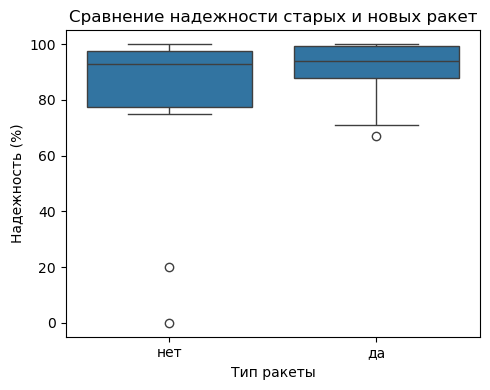

In [11]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['Activity'], y=data['SuccessRate'], data=data)

# Настройка заголовка и меток
plt.title('Сравнение надежности старых и новых ракет')
plt.xlabel('Тип ракеты')
plt.ylabel('Надежность (%)')

# Показать график
plt.tight_layout()
plt.show()

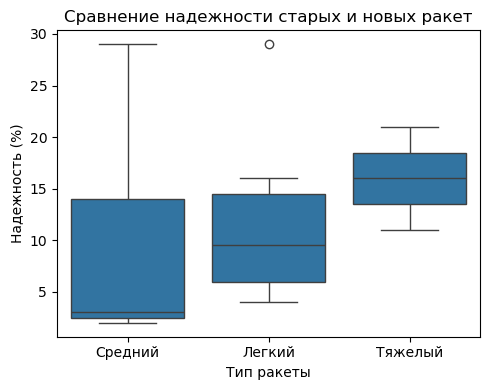

In [13]:
filtered_data = data[data['Activity'] == 'нет']
plt.figure(figsize=(5, 4))
sns.boxplot(x=filtered_data['Class'], y=filtered_data['ActiveYears'], data=filtered_data)

# Настройка заголовка и меток
plt.title('Сравнение надежности старых и новых ракет')
plt.xlabel('Тип ракеты')
plt.ylabel('Надежность (%)')

# Показать график
plt.tight_layout()
plt.show()

Коэффициент корреляции между ActiveYears и SuccessRate: 1.00


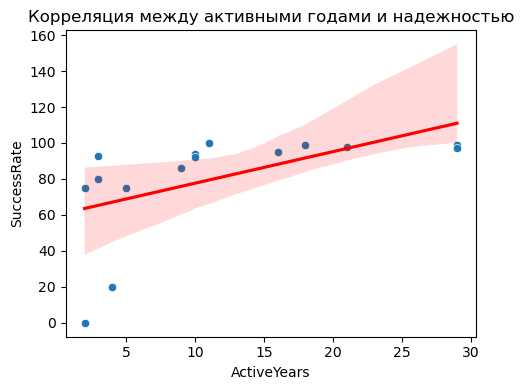

In [14]:
correlation = filtered_data['SuccessRate'].corr(filtered_data['SuccessRate'])
print(f'Коэффициент корреляции между ActiveYears и SuccessRate: {correlation:.2f}')

plt.figure(figsize=(5, 4))
sns.scatterplot(x='ActiveYears', y='SuccessRate', data=filtered_data)

# Настройка заголовка и меток
plt.title('Корреляция между активными годами и надежностью')
plt.xlabel('Активные годы')
plt.ylabel('Надежность')

# Добавление линии регрессии
sns.regplot(x='ActiveYears', y='SuccessRate', data=filtered_data, scatter=False, color='red')

# Показать график
plt.tight_layout()
plt.show()

Коэффициент корреляции между LEO и FullMass: 0.89


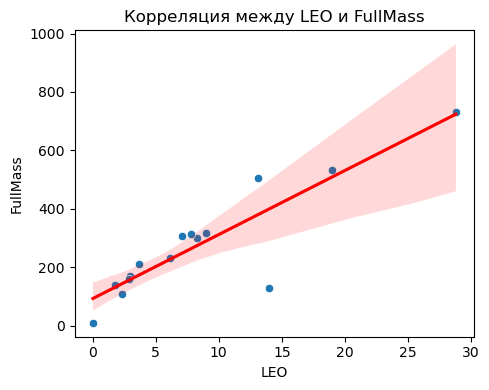

In [15]:
correlation = filtered_data['LEO'].corr(filtered_data['FullMass'])
print(f'Коэффициент корреляции между LEO и FullMass: {correlation:.2f}')

plt.figure(figsize=(5, 4))
sns.scatterplot(x='LEO', y='FullMass', data=filtered_data)

# Настройка заголовка и меток
plt.title('Корреляция между LEO и FullMass')
plt.xlabel('LEO')
plt.ylabel('FullMass')

# Добавление линии регрессии
sns.regplot(x='LEO', y='FullMass', data=filtered_data, scatter=False, color='red')

# Показать график
plt.tight_layout()
plt.show()


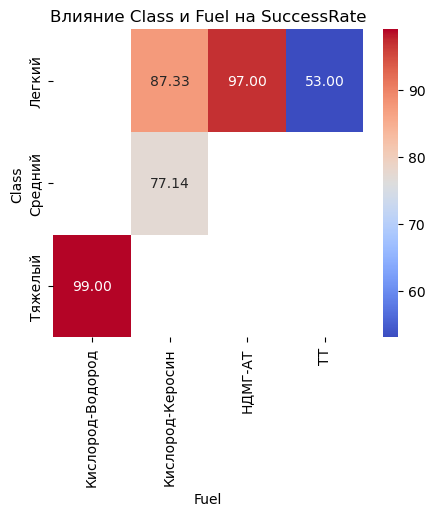

In [17]:
pivot_table = pd.pivot_table(data=filtered_data, values='SuccessRate', index='Class', columns='Fuel')

# Создайте тепловую карту
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Влияние Class и Fuel на SuccessRate')
plt.xlabel('Fuel')
plt.ylabel('Class')
plt.show()

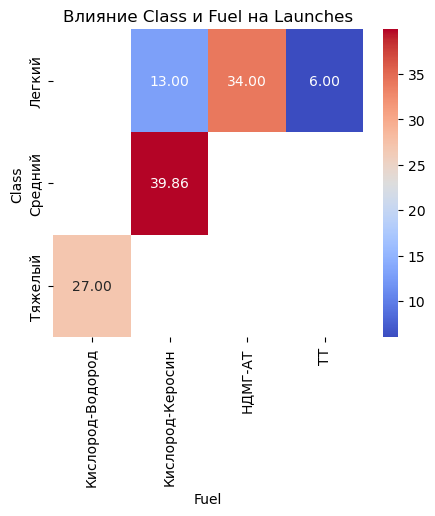

In [18]:
pivot_table = pd.pivot_table(data=filtered_data, values='Launches', index='Class', columns='Fuel')

# Создайте тепловую карту
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Влияние Class и Fuel на Launches')
plt.xlabel('Fuel')
plt.ylabel('Class')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = data[['LEO']]
y = data['FullMass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

accuracy = 1 - (mae / (y_test.max() - y_test.min()))
print(f'Точность модели: {accuracy:.2f}')

def predict_start_mass(leo):
    return model.predict([[leo]])[0]

leo = 1000
start_mass = predict_start_mass(leo)
print(f'Предсказанный StartMass для LEO={leo}: {start_mass:.2f}')

Точность модели: 0.89
Предсказанный StartMass для LEO=1000: 25852.59


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
